## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC


In [10]:
ha = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
ha

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease
...,...,...,...,...,...,...,...,...,...
199,Bridgett Franecki,55,0,1,128,205,2,130,No Disease
200,Mr. Foster Zieme,51,1,3,94,227,1,154,Disease
201,Lashanda Hagenes,42,1,2,120,295,1,162,Disease
202,Levern Trantow III,35,0,1,138,183,1,182,Disease


In [27]:

X = ha[['age', 'chol']]
y = ha['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
lr = LogisticRegression()

lr.fit(X_train, y_train)

b0 = lr.intercept_[0]
b1 = lr.coef_[0][0]
b2 = lr.coef_[0][1]

def cholesterol_level_for_risk(age, probability, b0, b1, b2):
    log_odds = np.log(probability / (1 - probability))
    return (log_odds - b0 - b1 * age) / b2

chol_50_percent = cholesterol_level_for_risk(55, 0.5, b0, b1, b2)
chol_90_percent = cholesterol_level_for_risk(55, 0.9, b0, b1, b2)
print("Cholesterol level for 50% probability of heart disease:", chol_50_percent)
print("Cholesterol level for 90% probability of heart disease:", chol_90_percent)

Cholesterol level for 50% probability of heart disease: 286.8689828226064
Cholesterol level for 90% probability of heart disease: 967.5336494717305


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [30]:

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
b0_lda = lda.intercept_[0]
b1_lda, b2_lda = lda.coef_[0]

chol_for_55_lda = (0 - b0_lda - b1_lda * 55) / b2_lda
print("Cholesterol level for heart disease prediction at age 55:", chol_for_55_lda)

Cholesterol level for heart disease prediction at age 55: 368.235357529938


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [32]:
svc = SVC(kernel='linear')
param_grid = {'C': [0.1, 1, 10, 100]}

grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_svc = grid_search.best_estimator_

b0_svc = best_svc.intercept_[0]
b1_svc, b2_svc = best_svc.coef_[0]

chol_for_55_svc =  (0 - b0_svc - b1_svc * 55) / b2_svc
print("Cholesterol level for heart disease prediction at age 55:", chol_for_55_svc)


Cholesterol level for heart disease prediction at age 55: 250.14017566578826


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

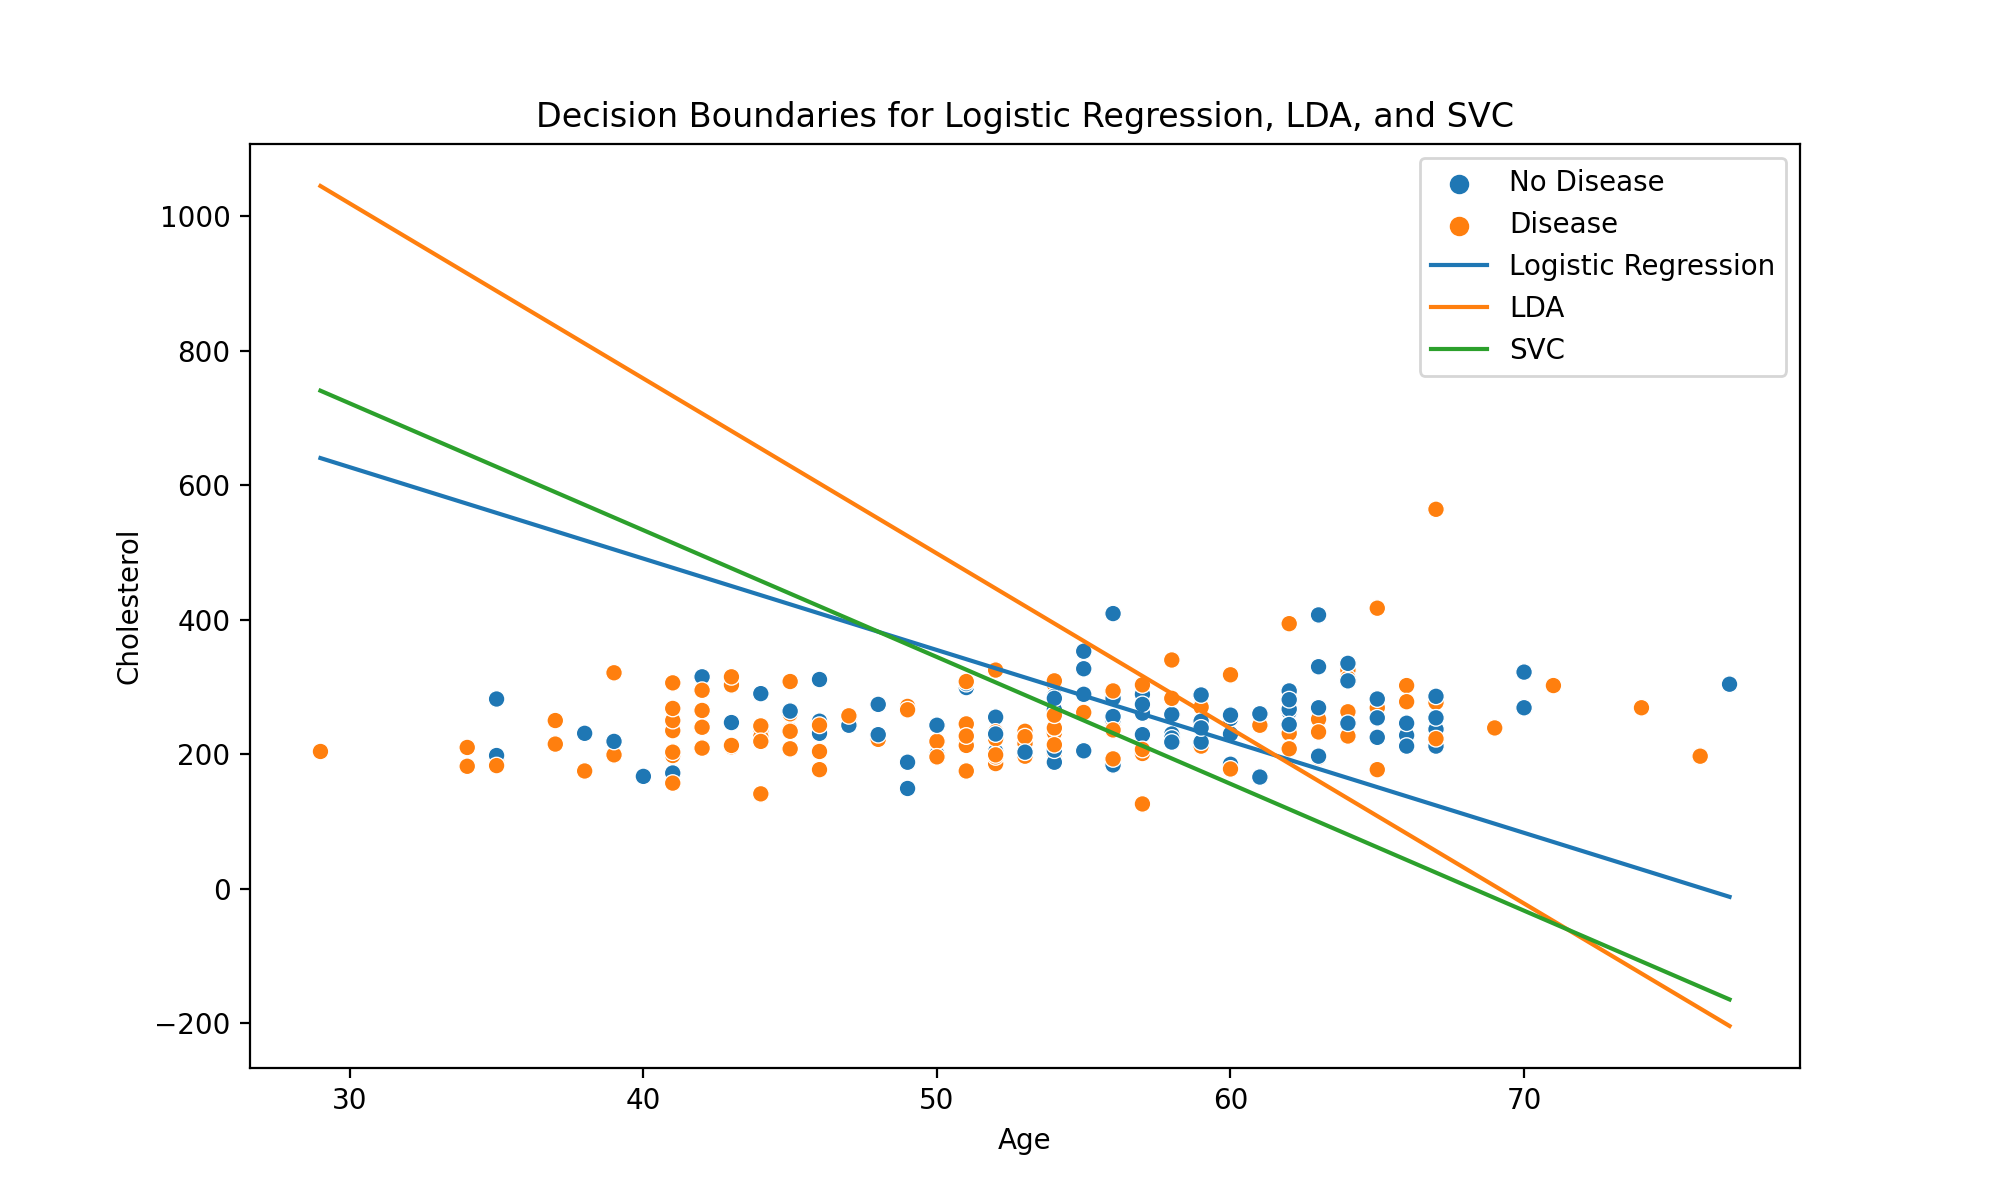

In [36]:
def lr_decision_boundary(age):
    return (0 - b0 - b1 * age) / b2
def lda_decision_boundary(age):
    return (0 - b0_lda - b1_lda * age) / b2_lda
def svc_decision_boundary(age):
    return (0 - b0_svc - b1_svc * age) / b2_svc
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='chol', hue='diagnosis', data=ha)
age_range = np.linspace(ha['age'].min(), ha['age'].max(), 100)

plt.plot(age_range, [lr_decision_boundary(age) for age in age_range], label='Logistic Regression')
plt.plot(age_range, [lda_decision_boundary(age) for age in age_range], label='LDA')
plt.plot(age_range, [svc_decision_boundary(age) for age in age_range], label='SVC')

plt.title('Decision Boundaries for Logistic Regression, LDA, and SVC')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend()
plt.show()
